In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd

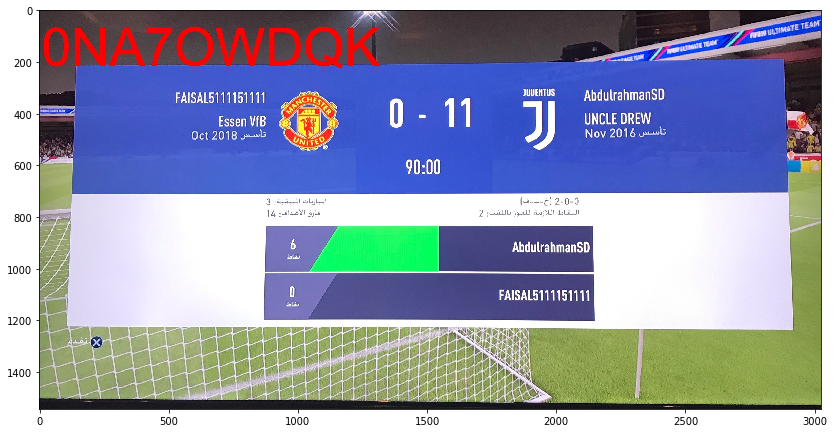

In [2]:
img = cv2.imread('images/fifa.jpg')
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

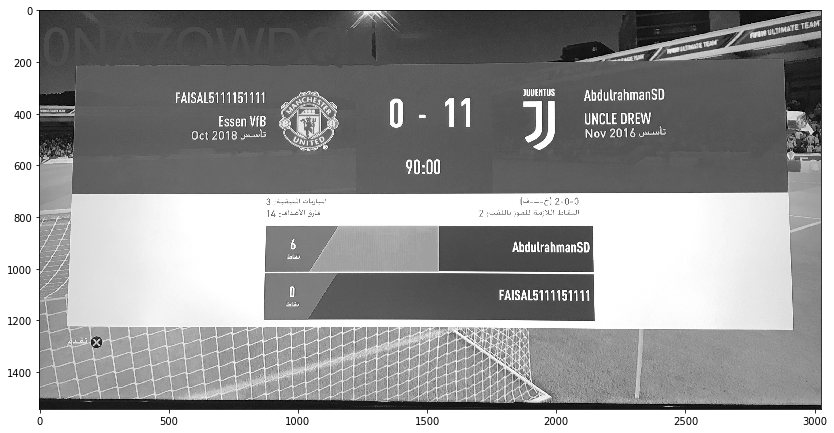

In [3]:
plt.figure(figsize=(14,8))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

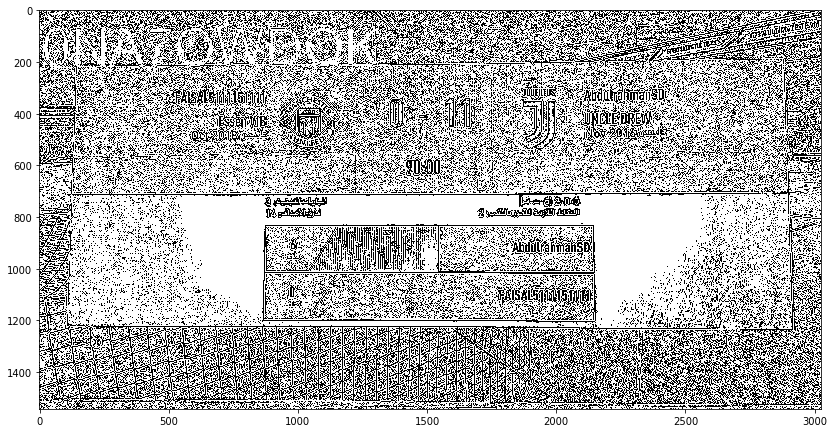

In [4]:
thresh=cv2.adaptiveThreshold(gray, 200, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=9, C=0)
plt.figure(figsize=(14,8))
plt.imshow(thresh, cmap='gray')

In [5]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:20]
# loop over our contours
final_contours = []
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.015 * peri, True)
 
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) == 4:
		final_contours.append(approx)
print(f'Number of contours: {len(final_contours)}')

Number of contours: 6


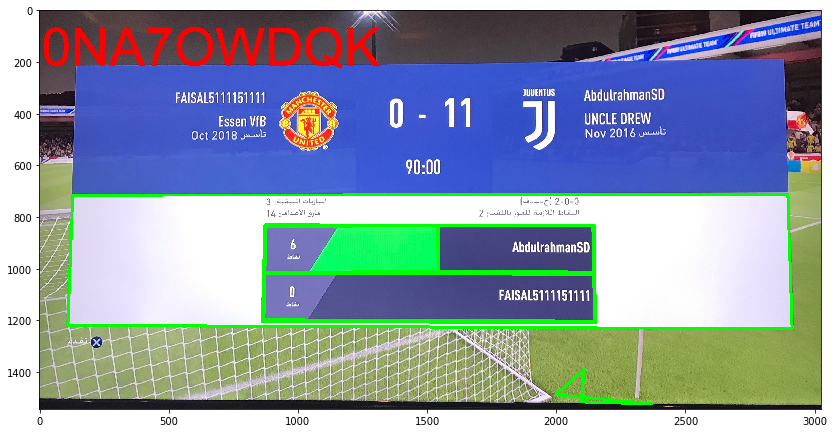

In [6]:
img_ed=img.copy()
for i in range(len(final_contours)):
    cnt = final_contours[i]
    cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

In [29]:
def detect_contour_bottom(gray, im_show=True, raw_img = img):
    thresh=cv2.adaptiveThreshold(gray, 200, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=9, C=0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:20]
    # loop over our contours
    final_contours = []
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.015 * peri, True)

        # if our approximated contour has four points, then
        # we can assume that we have found our screen
        if len(approx) == 4:
            final_contours.append(approx)
    print(f'Number of contours: {len(final_contours)}')
    
   
    img_ed=raw_img.copy()
    for i in range(len(final_contours)):
        cnt = final_contours[i]
        cv2.drawContours(img_ed, [cnt], 0, (0,255,0), 10)
    if im_show:
        plt.figure(figsize=(14,8))
        plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))
        
    return final_contours,img_ed
    

Number of contours: 6


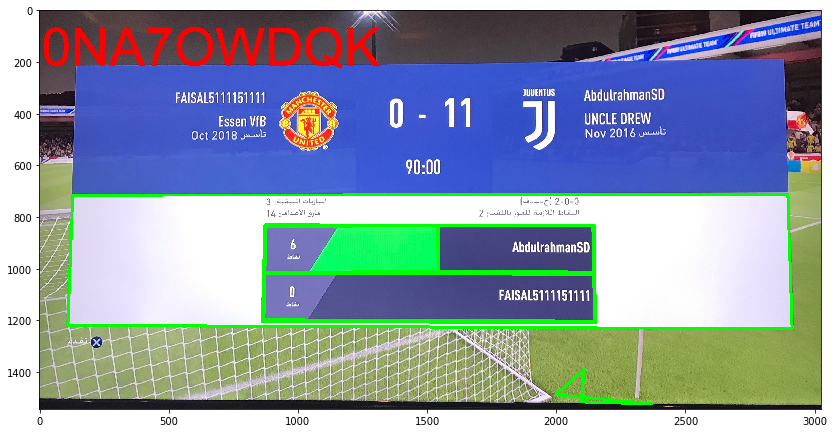

In [8]:
final_contours, _  = detect_contour_bottom(gray, im_show=True, raw_img = img)

In [9]:
#c = np.array([[215,263],[790,407]])
cv2.contourArea(final_contours[0])

1423509.0

In [10]:
def rect_area(c):
    return (c[1][0] - c[0][0])*(c[1][1] - c[0][1])

def coutour2rect(c):
    c=c.reshape(4,2)
    x1,y1 = (np.min(c[:,0]), np.min(c[:,1]))
    x2,y2 = (np.max(c[:,0]), np.max(c[:,1]))
    return np.array([[x1,y1],[x2,y2]])       

In [11]:
# region of interest
roi = np.array([[125,712],[2913,1236]])
roi[0][0]

125

In [15]:
matches_map = {'0NA7OWDQK.jpg': {'top': [[141,213],[2899,701]],
                                 'bottom': [[125,712],[2913,1236]]
                                 },
               '0CAUQSQDG0.jpg': {'top': [[1,1544],[2913,1924]],
                                  'bottom': [[289,2008],[2461,3028]]
                                 },
               '0DF1AA42B9.jpg': {'top': [[64,33],[1062,153]],
                                  'bottom': [[203,184],[927,520]]
                                 },
               '0G1UJLATWE.jpg': {'top': [[49,113],[3233,517]],
                                  'bottom': [[549,633],[3264,2286]]
                                 },
               '0I6P2YFPAU.jpg': {'top': [[1,1],[4029,637]],
                                  'bottom': [[205,797],[4029,2461]]
                                 },
               '0OAAZRH8NU.jpg': {'top': [[441,21],[3613,377]],
                                  'bottom': [[885,505],[3181,1537]]
                                 },
               '0QNHKHHEZ0.jpg': {'top': [[39,477],[707,559]],
                                  'bottom': [[135,599],[615,801]]
                                 },
               '1B2LRP3F7K.jpg': {'top': [[5,113],[3257,605]],
                                  'bottom': [[345,717],[3077,1973]]
                                 },
               '1BD5PXLNTK.jpg': {'top': [[1,819],[4021,999]],
                                  'bottom': [[297,1375],[3761,2743]]
                                 },
                '1F28E63C50.jpg': {'top': [[73,489],[4025,1061]],
                                  'bottom': [[605,1125],[3657,2629]]
                                 }
               
              }

In [16]:
import glob

In [17]:
path = 'images\\screen_matches\\'
files = glob.glob(path+'*.jpg')
print(files)

['images\\screen_matches\\0CAUQSQDG0.jpg', 'images\\screen_matches\\0DF1AA42B9.jpg', 'images\\screen_matches\\0G1UJLATWE.jpg', 'images\\screen_matches\\0I6P2YFPAU.jpg', 'images\\screen_matches\\0NA7OWDQK.jpg', 'images\\screen_matches\\0OAAZRH8NU.jpg', 'images\\screen_matches\\0QNHKHHEZ0.jpg', 'images\\screen_matches\\1B2LRP3F7K.jpg', 'images\\screen_matches\\1BD5PXLNTK.jpg', 'images\\screen_matches\\1F28E63C50.jpg']


In [43]:
#x=matches_map[f_name]['bottom']
def draw_rect(x,img,color=(255, 0, 0)):
    pt1=tuple(x[0])
    pt2=tuple(x[1])
    img_rect = cv2.rectangle(img, pt1,pt2,color , 5)

In [34]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
 
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
 
	# return the intersection over union value
	return iou

Number of contours: 1
file: 0CAUQSQDG0.jpg
iou: 0.3053096208340902
Number of contours: 1
file: 0DF1AA42B9.jpg
iou: 0.016317150942765344
Number of contours: 2
file: 0G1UJLATWE.jpg
iou: 0.6011212620412911
Number of contours: 2
file: 0I6P2YFPAU.jpg
iou: 0.777684783056395
Number of contours: 6
file: 0NA7OWDQK.jpg
iou: 0.9871078796807924
Number of contours: 5
file: 0OAAZRH8NU.jpg
iou: 0.9099966982524113
Number of contours: 3
file: 0QNHKHHEZ0.jpg
iou: 0.0
Number of contours: 2
file: 1B2LRP3F7K.jpg
iou: 0.4299454386534025
Number of contours: 0
Detection fail
file: 1BD5PXLNTK.jpg
iou: 0
Number of contours: 2
file: 1F28E63C50.jpg
iou: 0.3326513978408036


{'0CAUQSQDG0.jpg': 0.3053096208340902,
 '0DF1AA42B9.jpg': 0.016317150942765344,
 '0G1UJLATWE.jpg': 0.6011212620412911,
 '0I6P2YFPAU.jpg': 0.777684783056395,
 '0NA7OWDQK.jpg': 0.9871078796807924,
 '0OAAZRH8NU.jpg': 0.9099966982524113,
 '0QNHKHHEZ0.jpg': 0.0,
 '1B2LRP3F7K.jpg': 0.4299454386534025,
 '1BD5PXLNTK.jpg': 0,
 '1F28E63C50.jpg': 0.3326513978408036}

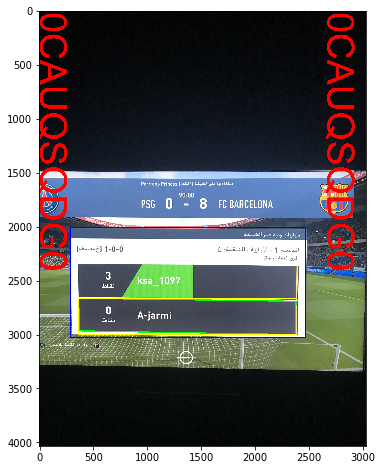

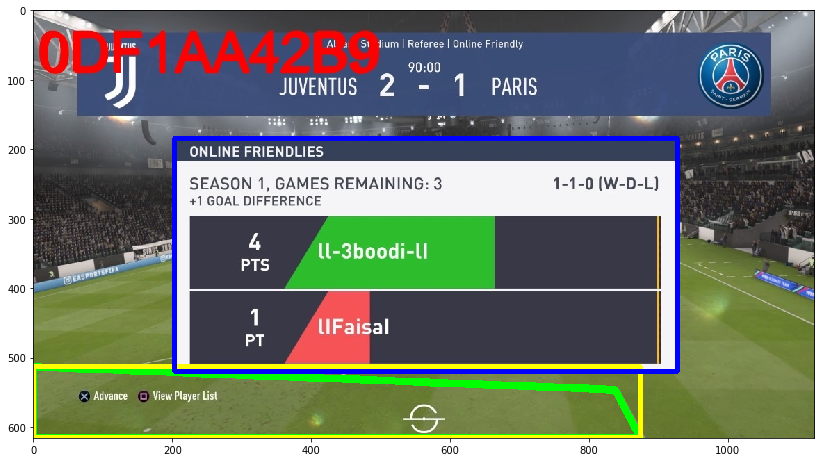

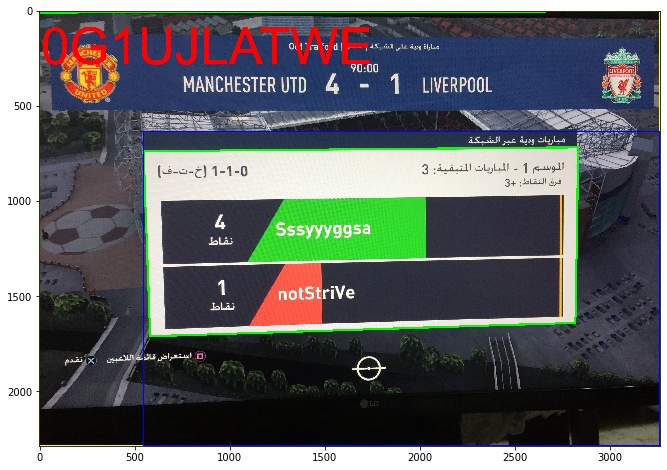

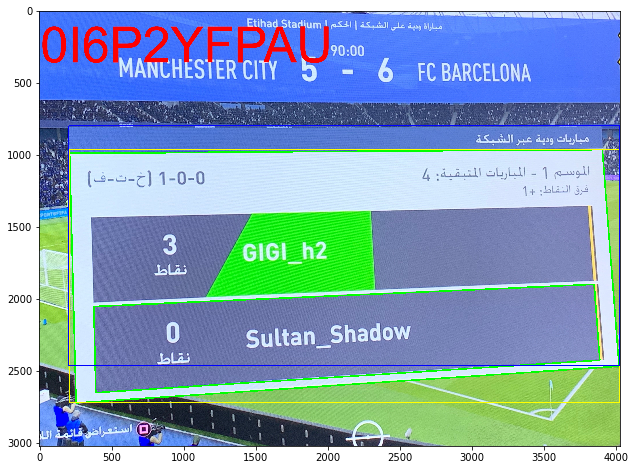

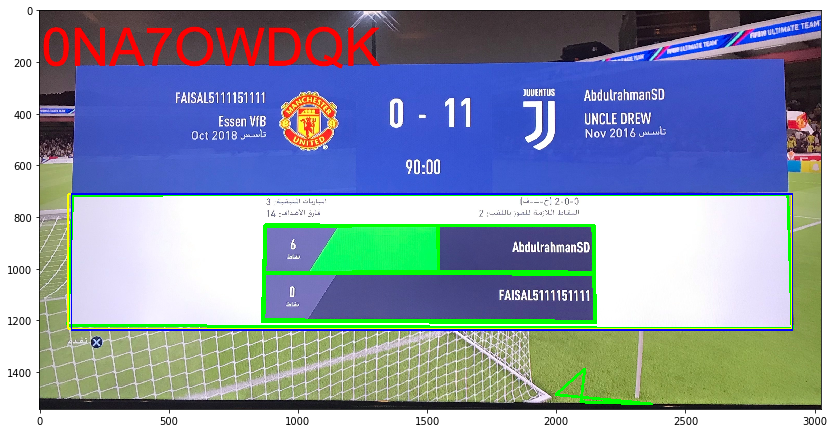

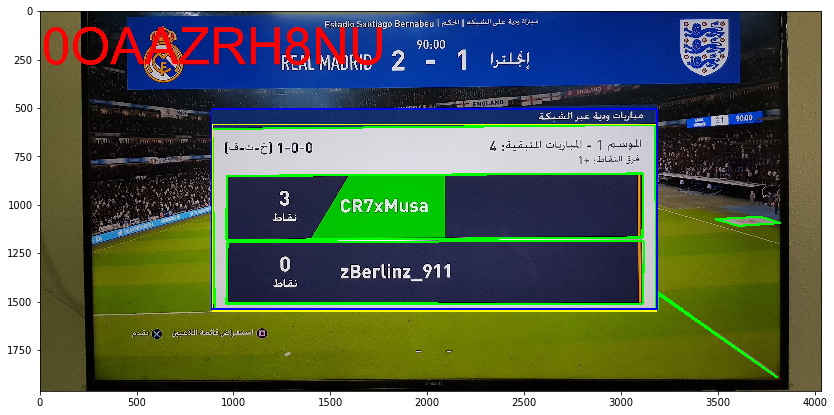

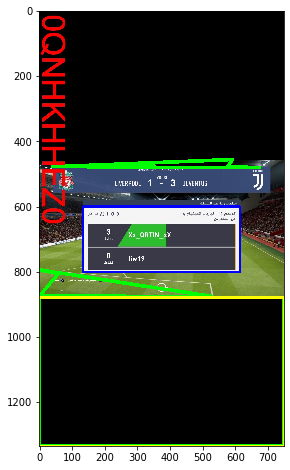

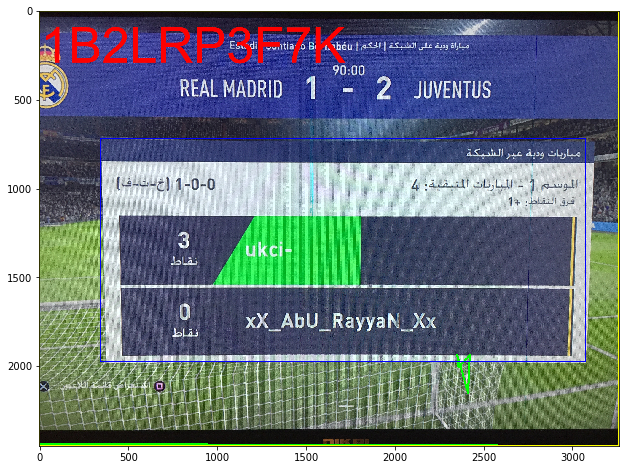

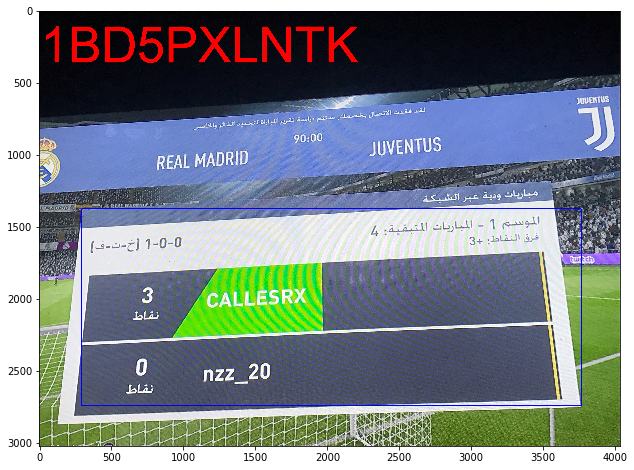

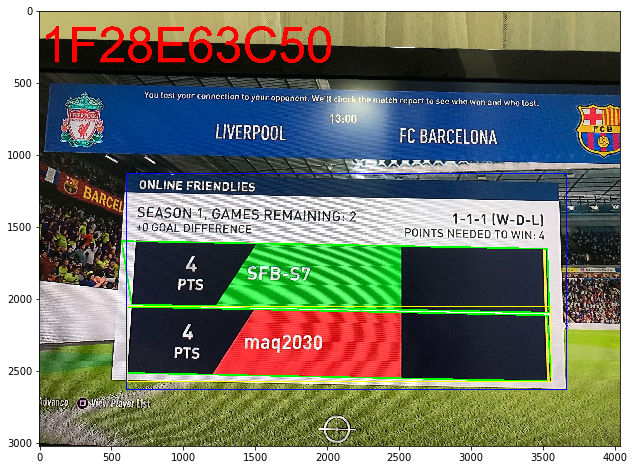

In [53]:
D={}
for f in files:
    img = cv2.imread(f)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f_name = f.split('\\')[-1]
    final_contours, img_ed = detect_contour_bottom(gray, im_show=False, raw_img = img)
    if len(final_contours)>0:
        #acc = iou(final_contours[0],np.array(matches_map[f_name]['bottom']))
        boxA=coutour2rect(final_contours[0]).ravel()
        boxB=np.array(matches_map[f_name]['bottom']).ravel()
        acc = bb_intersection_over_union(boxA, boxB)
        draw_rect(coutour2rect(final_contours[0]),img_ed,(0,255,255))
        
    else:
        print('Detection fail')
        acc=0
    print(f'file: {f_name}')
    print(f'iou: {acc}')
    D[f_name]=acc
    draw_rect(matches_map[f_name]['bottom'],img_ed)
    
    plt.figure(figsize=(14,8))
    plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))
D

In [62]:
print(f'Accuracy: {(len([i for i in D if D[i]>0.5])/len(D.keys()))*100}')

Accuracy: 40.0


In [ ]:
#Test

Number of contours: 2
iou: 0.4299454386534025


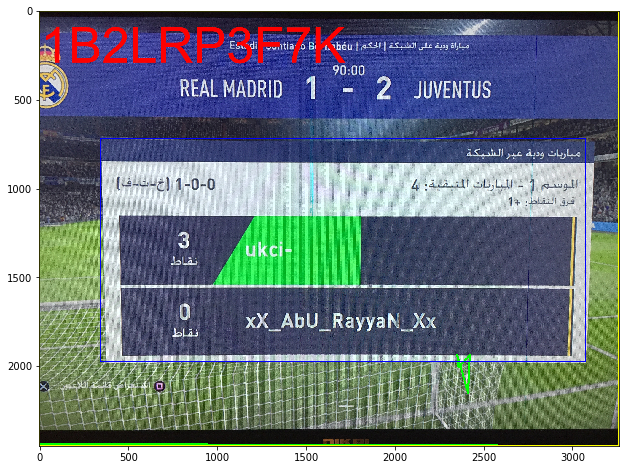

In [56]:
f='images\\screen_matches\\1B2LRP3F7K.jpg'
img = cv2.imread(f)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
f_name = f.split('\\')[-1]
final_contours, img_ed = detect_contour_bottom(gray, im_show=False, raw_img = img)
if len(final_contours)>0:
    #acc = iou(coutour2rect(final_contours[0]),np.array(matches_map[f_name]['bottom']))
    boxA=coutour2rect(final_contours[0]).ravel()
    boxB=np.array(matches_map[f_name]['bottom']).ravel()
    acc = bb_intersection_over_union(boxA, boxB)
    print(f'iou: {acc}')
draw_rect(matches_map[f_name]['bottom'],img_ed)
draw_rect(coutour2rect(final_contours[0]),img_ed,(0,255,255))
plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img_ed, cv2.COLOR_BGR2RGB))

In [57]:
boxA

array([   0,    0, 3263, 2447], dtype=int32)

In [ ]:
cv2.imshow('raw image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()